# Simulation

In [17]:
from blackjacksim.simulations import Game
from tqdm import tnrange
import numpy as np

config = {
    'wallet':{
        'class':'PlayerWallet',
        'params':{
            'wager_unit':1,
            'wager_pool':10000000,
        }
    }, 
    'house':{
        'class':'Blackjack32',
        'params':{}
    },
    'dealer':{
        'class':'Dealer',
        'params':{
            'strategy':'hit_on_soft_17'
        },
    },
    'player':{
        'class':'Player',
        'params':{
            'strategy':'basic'
        }
    },
    'shoe':{ 
        'class':'Shoe', 
        'params':{
            'size':1,
            'cut_card_position':0.75,
        }
    }
}

S = None
for _ in tnrange(200):
    g = Game(config)
    for _ in range(100):
        g.round()
    if S is None:
        S = np.stack(g.data.State) 
        w = np.array(g.data.Advantage)
    else:
        S = np.concatenate([S, np.stack(g.data.State)])
        w = np.concatenate([w, np.stack(g.data.Advantage)])
        
S = np.stack(g.data.State)
print(S.shape)
i = np.array(g.data.Advantage.apply(np.sign))
i[i==0] = -1

print(i)




(100, 10)
[ 1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
 -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1.
  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.
 -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.]


In [1]:
config = lambda house_rules: {
    'wallet':{
        'class':'PlayerWallet',
        'params':{
            'wager_unit':1,
            'wager_pool':100,
        }
    }, 
    'house':{
        'class':house_rules,
        'params':{}
    },
    'dealer':{
        'class':'Dealer',
        'params':{
            'strategy':'hit_on_soft_17'
        },
    },
    'player':{
        'class':'Player',
        'params':{
            'strategy':'basic'
        }
    },
    'shoe':{ 
        'class':'Shoe', 
        'params':{
            'size':2,
            'cut_card_position':0.75,
        }
    }
}


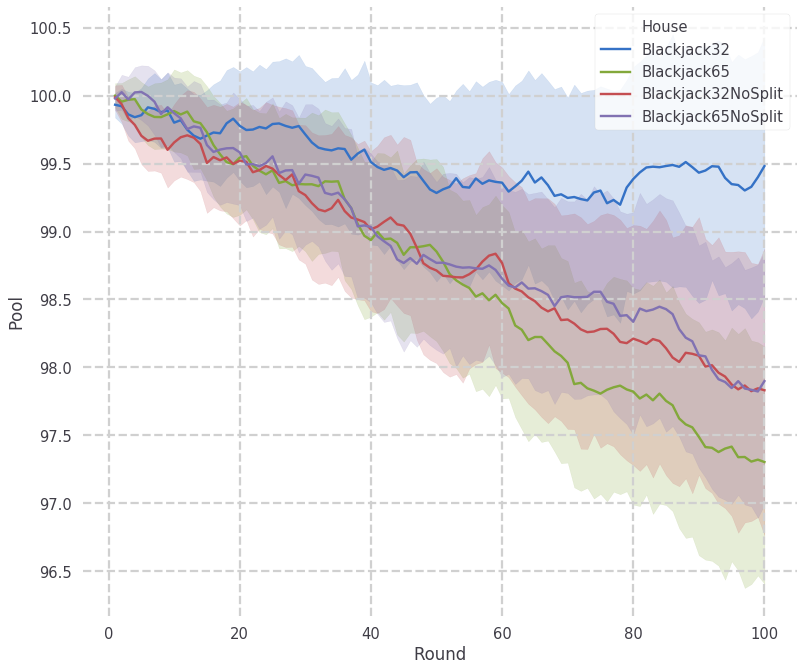

In [4]:
from blackjacksim.simulations import Game
import matplotlib
%matplotlib inline
from tqdm import tnrange
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
jtplot.style(context='poster', fscale=1.4, spines=False, gridlines='--')

try:
    df = df
except:
    df = None
pbar = tqdm(['Blackjack32', 'Blackjack65', 'Blackjack32NoSplit', 'Blackjack65NoSplit'])
trials = 200
rounds = 100
for house in pbar:
    for i in range(trials):
        pbar.set_description("{} {:04d}/{:04d}: ".format(house,i,trials))
        g = Game(config(house))
        for _ in range(rounds):
            g.round()
        if df is None:
            df = g.data 
        else:
            df = pd.concat([df,g.data]) 
            
sns.lineplot(x='Round', y='Pool', hue='House', data=df)
plt.show()

In [1]:
from blackjacksim.pytorch import BlackJackDataset

config = {
    'wallet':{
        'class':'PlayerWallet',
        'params':{
            'wager_unit':1,
            'wager_pool':10000000,
        }
    }, 
    'house':{
        'class':'Blackjack32',
        'params':{}
    },
    'dealer':{
        'class':'Dealer',
        'params':{
            'strategy':'hit_on_soft_17'
        },
    },
    'player':{
        'class':'Player',
        'params':{
            'strategy':'basic'
        }
    },
    'shoe':{ 
        'class':'Shoe', 
        'params':{
            'size':1,
            'cut_card_position':0.75,
        }
    }
}
from tqdm import tqdm_notebook as tqdm

b = BlackJackDataset(200, config, max_len=10)
for S,w in tqdm(b):
    print(S.shape, w.shape)

torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])
torch.Size([200, 10]) torch.Size([200])



TypeError: cannot unpack non-iterable NoneType object